In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ID_sample = 10

In [3]:
df = pd.read_csv(f"../Data/water_meters/{str(ID_sample).zfill(4)}.csv")
df["SAMPLETIME"] = pd.to_datetime(df["SAMPLETIME"], utc=True)
df.head()

,SAMPLETIME,READING,DELTA
0,2019-02-01 00:46:29+00:00,10215.0,0.0
1,2019-02-01 01:46:29+00:00,10215.0,0.0
2,2019-02-01 02:46:29+00:00,10215.0,0.0
3,2019-02-01 03:46:31+00:00,10215.0,0.0
4,2019-02-01 04:46:31+00:00,10215.0,0.0


<AxesSubplot:title={'center':'Daily delta'}, xlabel='SAMPLETIME', ylabel='DELTA'>

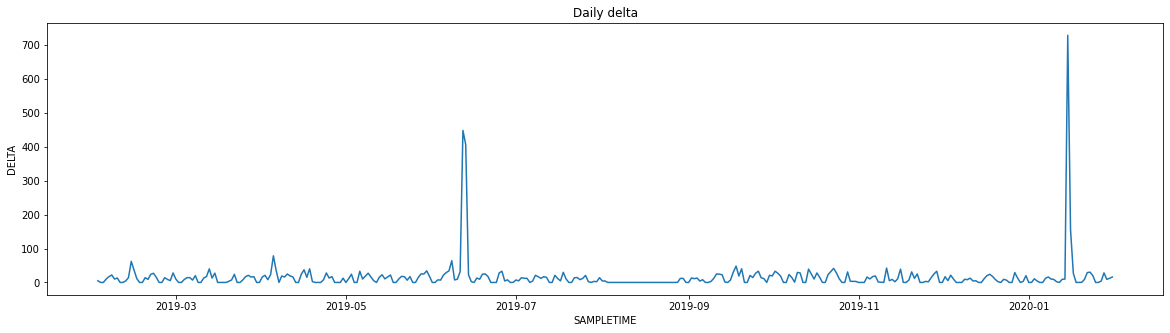

In [4]:
temp = df.copy()
temp.index = temp.SAMPLETIME
temp = temp.groupby(pd.Grouper(freq='D')).sum()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Daily delta")
sns.lineplot(data=temp, y="DELTA", x=temp.index, ax=ax)

<AxesSubplot:title={'center':'Hourly delta'}, xlabel='SAMPLETIME', ylabel='DELTA'>

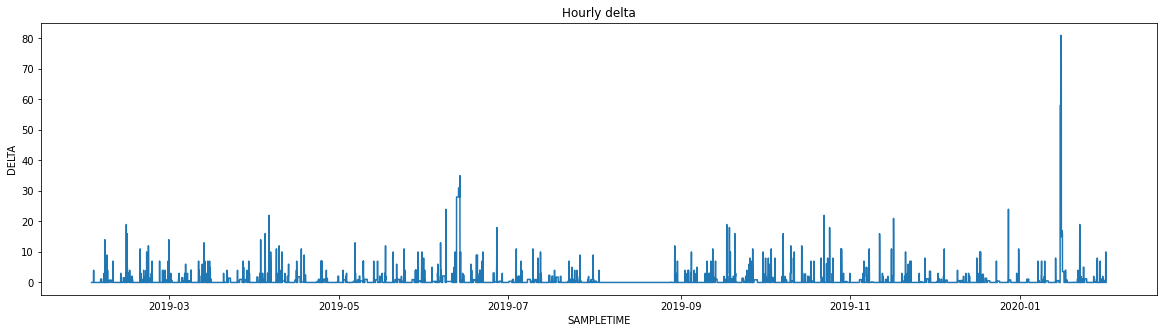

In [5]:
temp = df.copy()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Hourly delta")
sns.lineplot(data=temp, y="DELTA", x="SAMPLETIME", ax=ax)

<AxesSubplot:title={'center':'Distribution of hourly deltas hour-wise'}, xlabel='SAMPLETIME', ylabel='DELTA'>

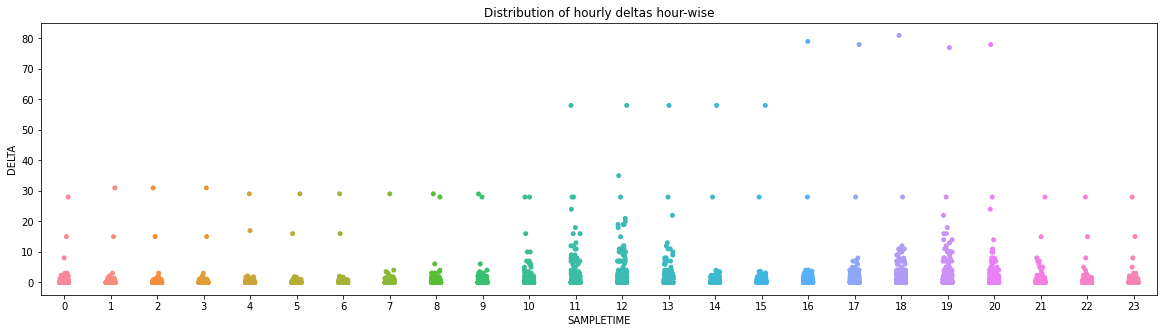

In [6]:
temp = df.copy()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Distribution of hourly deltas hour-wise")
sns.stripplot(data=temp, y="DELTA", x=temp.SAMPLETIME.dt.hour, jitter=True, ax=ax)

<AxesSubplot:title={'center':'Distribution of daily deltas weekday-wise'}, xlabel='SAMPLETIME', ylabel='DELTA'>

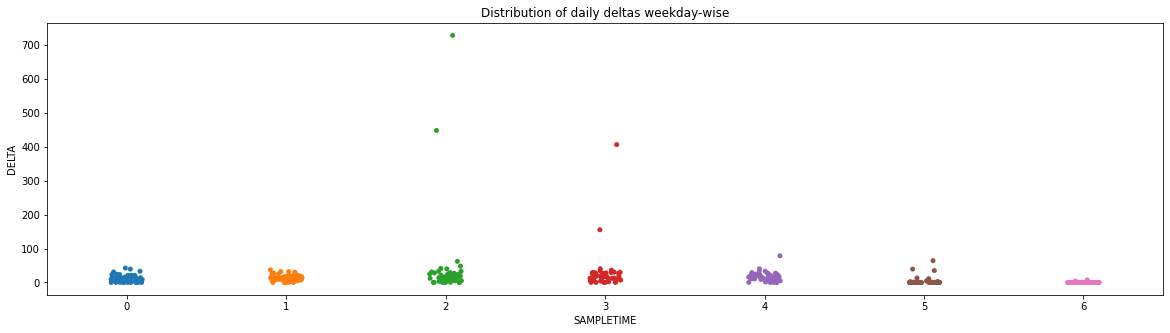

In [7]:
temp = df.copy()
temp.index = temp.SAMPLETIME
temp = temp.groupby(pd.Grouper(freq='D')).sum()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Distribution of daily deltas weekday-wise")
sns.stripplot(data=temp, y="DELTA", x=temp.index.weekday, jitter=True, ax=ax)

<AxesSubplot:title={'center':'Distribution of hourly deltas weekday-wise'}, xlabel='SAMPLETIME', ylabel='DELTA'>

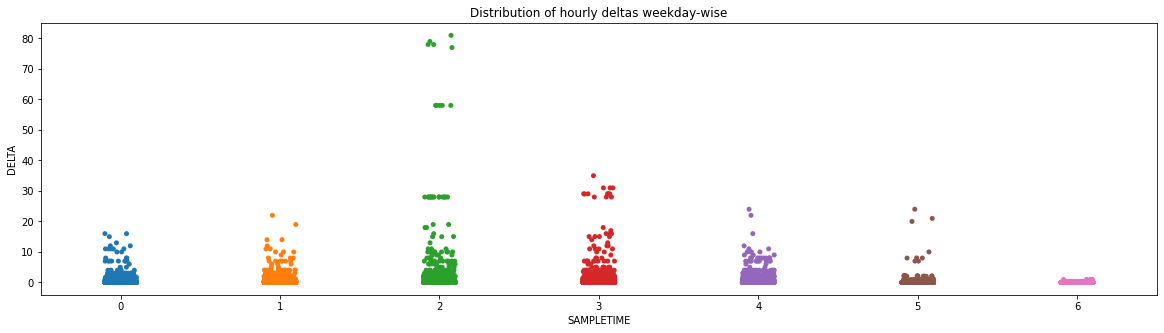

In [8]:
temp = df.copy()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Distribution of hourly deltas weekday-wise")
sns.stripplot(data=temp, y="DELTA", x=temp.SAMPLETIME.dt.weekday, jitter=True, ax=ax)

<AxesSubplot:title={'center':'Distribution of daily deltas month-wise'}, xlabel='SAMPLETIME', ylabel='DELTA'>

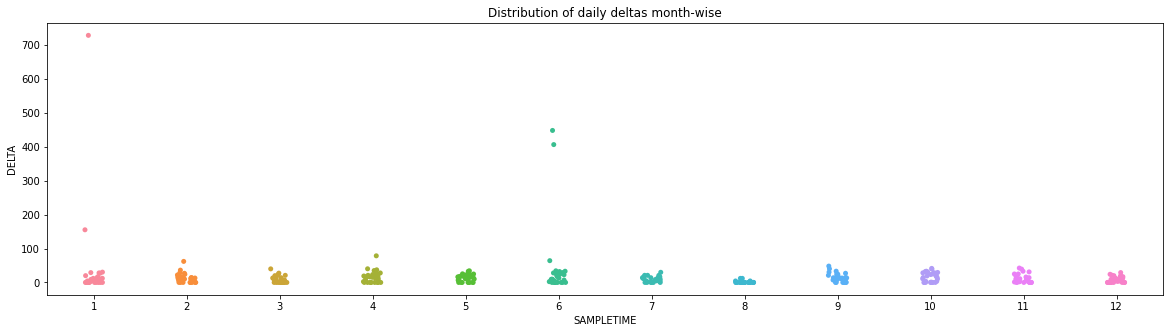

In [9]:
temp = df.copy()
temp.index = temp.SAMPLETIME
temp = temp.groupby(pd.Grouper(freq='D')).sum()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Distribution of daily deltas month-wise")
sns.stripplot(data=temp, y="DELTA", x=temp.index.month, jitter=True, ax=ax)

<AxesSubplot:title={'center':'Distribution of hourly deltas month-wise'}, xlabel='SAMPLETIME', ylabel='DELTA'>

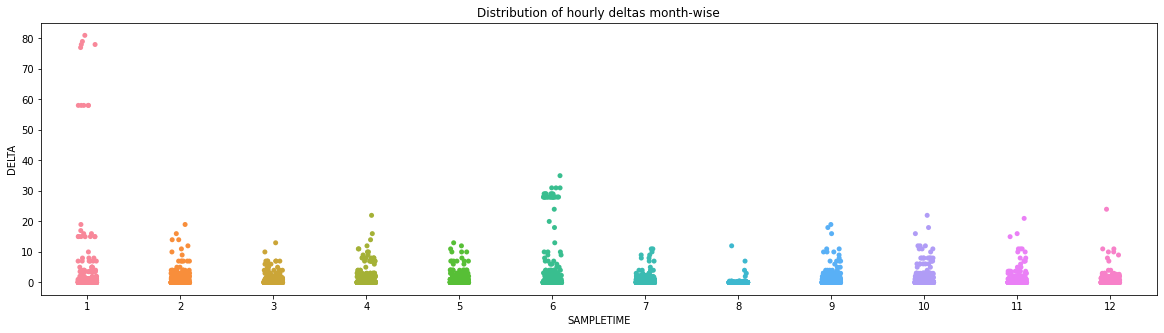

In [10]:
temp = df.copy()
# temp = temp.groupby(temp.index // 24).sum()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Distribution of hourly deltas month-wise")
sns.stripplot(data=temp, y="DELTA", x=temp.SAMPLETIME.dt.month, jitter=True, ax=ax)

In [11]:
# Visualize cyclical encoding with sine/cosine info

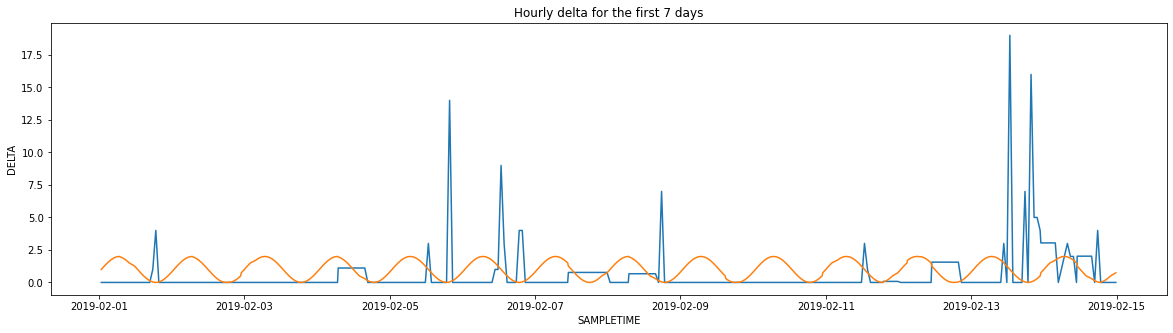

In [12]:
days = 14

temp = df.copy()
temp.index = temp.SAMPLETIME
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Hourly delta for the first 7 days")
sns.lineplot(data=temp[:24*days], y="DELTA", x=temp[:24*days].index, ax=ax)
ax.plot(temp[:24*days].index, 1+np.sin(temp[:24*days].index.hour/24*2*np.pi))
# ax.plot(temp[:24*days].index, 1+np.cos(temp[:24*days].index.hour/24*2*np.pi))

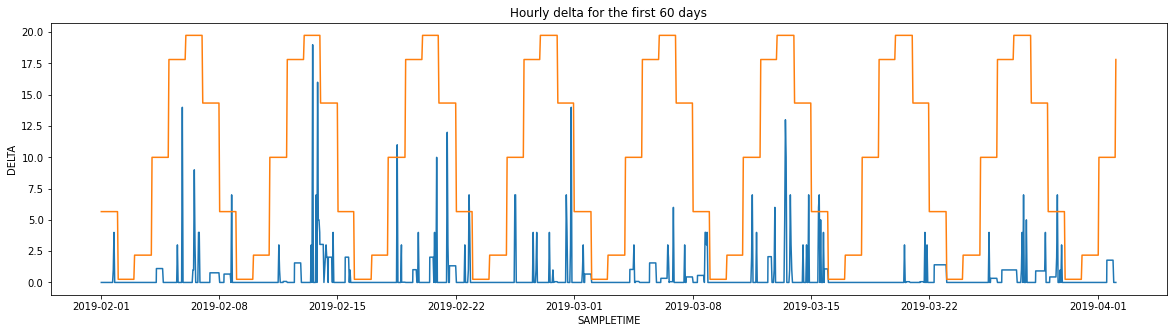

In [13]:
days = 60

temp = df.copy()
temp.index = temp.SAMPLETIME
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Hourly delta for the first 60 days")
sns.lineplot(data=temp[:24*days], y="DELTA", x=temp[:24*days].index, ax=ax)
ax.plot(temp[:24*days].index, 10+10*np.sin(temp[:24*days].index.weekday/7*2*np.pi))
# ax.plot(temp[:24*days].index, 10+10*np.cos(temp[:24*days].index.weekday/7*2*np.pi))

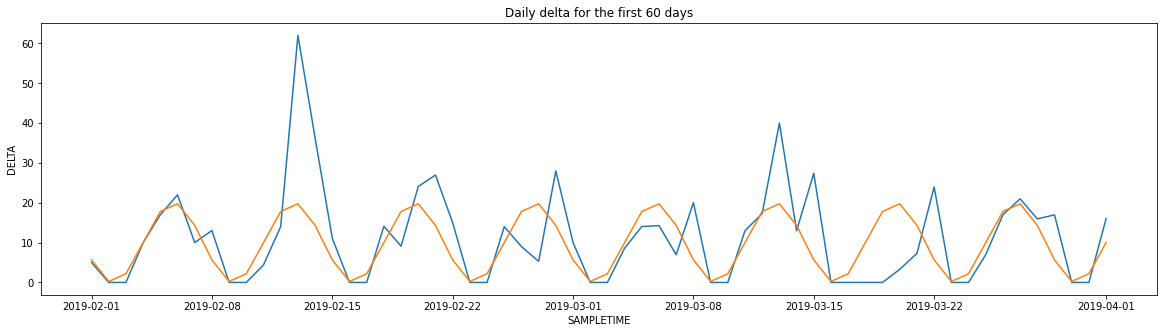

In [14]:
days = 60

temp = df.copy()
temp.index = temp.SAMPLETIME
temp = temp.groupby(pd.Grouper(freq='D')).sum()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Daily delta for the first 60 days")
sns.lineplot(data=temp[:days], y="DELTA", x=temp[:days].index, ax=ax)
ax.plot(temp[:days].index, 10+10*np.sin(temp[:days].index.weekday/7*2*np.pi))
# ax.plot(temp[:days].index, 10+10*np.cos(temp[:days].index.weekday/7*2*np.pi))

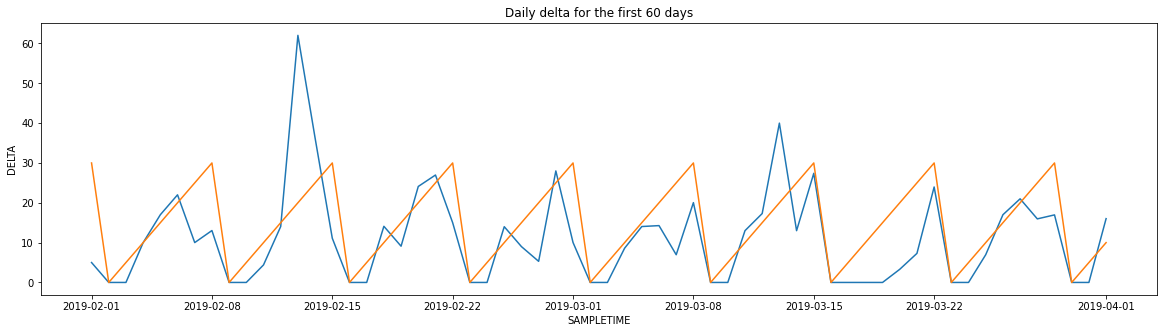

In [15]:
days = 60

temp = df.copy()
temp.index = temp.SAMPLETIME
temp = temp.groupby(pd.Grouper(freq='D')).sum()
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title("Daily delta for the first 60 days")
sns.lineplot(data=temp[:days], y="DELTA", x=temp[:days].index, ax=ax)
ax.plot(temp[:days].index, 5*((temp[:days].index.weekday+2)%7))
# ax.plot(temp[:days].index, 10+10*np.cos(temp[:days].index.weekday/7*2*np.pi))

In [16]:
# Radial basis functions

In [17]:
from sklego.preprocessing import RepeatingBasisFunction

In [18]:
temp = df.copy()
temp.index = temp.SAMPLETIME
temp = temp.groupby(pd.Grouper(freq='D')).sum()
temp["day"] = temp.index.dayofyear
rbf = RepeatingBasisFunction(n_periods=12, column="day", input_range=(1, 365))
rbf.fit(temp)
temp2 = pd.DataFrame(index=temp.index, data=rbf.transform(temp))
temp2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
SAMPLETIME,,,,,,,,,,,,
2019-02-01 00:00:00+00:00,0.351889,0.999517,0.384225,0.019989,0.000141,1.341028e-07,1.729329e-11,3.018061e-16,1.114240e-11,9.434503e-08,0.000108,0.016766
2019-02-02 00:00:00+00:00,0.328602,0.996986,0.409373,0.022749,0.000171,1.741309e-07,2.398558e-11,4.471318e-16,7.992884e-12,7.229005e-08,0.000088,0.014658
2019-02-03 00:00:00+00:00,0.306189,0.992301,0.435220,0.025834,0.000208,2.256159e-07,3.319547e-11,6.609963e-16,5.721161e-12,5.527057e-08,0.000072,0.012786
2019-02-04 00:00:00+00:00,0.284686,0.985494,0.461694,0.029273,0.000251,2.916887e-07,4.584199e-11,9.750311e-16,4.086211e-12,4.216629e-08,0.000059,0.011130
2019-02-05 00:00:00+00:00,0.264118,0.976609,0.488715,0.033098,0.000303,3.762924e-07,6.316902e-11,1.435139e-15,2.912148e-12,3.209910e-08,0.000048,0.009667


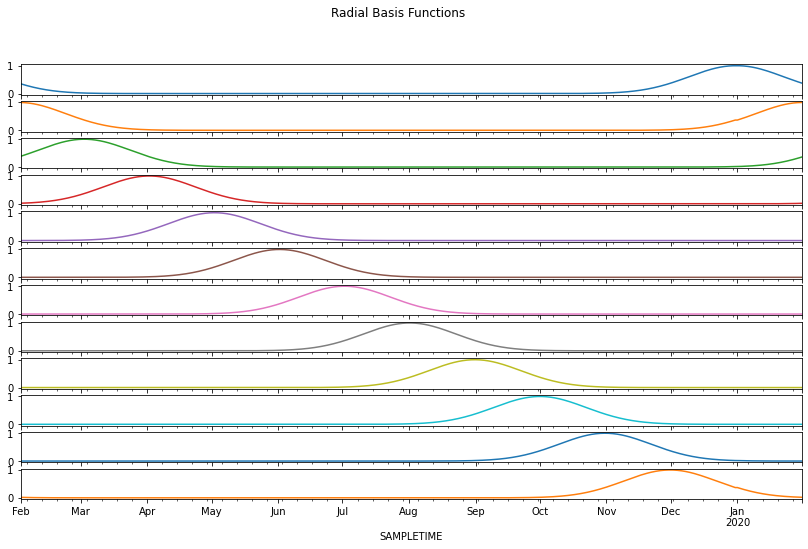

In [19]:
temp2.plot(subplots=True, figsize=(14, 8), sharex=True, title="Radial Basis Functions", legend=False);

In [20]:
temp = df.copy()
temp.index = temp.SAMPLETIME
temp = temp.groupby(pd.Grouper(freq='D')).sum()
temp["day"] = temp.index.weekday
rbf = RepeatingBasisFunction(n_periods=7, column="day", input_range=(0, 6))
rbf.fit(temp)
temp2 = pd.DataFrame(index=temp.index, data=rbf.transform(temp))
temp2.head()

,0,1,2,3,4,5,6
SAMPLETIME,,,,,,,
2019-02-01 00:00:00+00:00,0.004320,0.000015,0.000816,0.062177,0.641180,0.894839,0.169013
2019-02-02 00:00:00+00:00,0.256376,0.009146,0.000044,0.000326,0.034697,0.499352,0.972604
2019-02-03 00:00:00+00:00,1.000000,0.367879,0.018316,0.000123,0.000123,0.018316,0.367879
2019-02-04 00:00:00+00:00,1.000000,0.367879,0.018316,0.000123,0.000123,0.018316,0.367879
2019-02-05 00:00:00+00:00,0.256376,0.972604,0.499352,0.034697,0.000326,0.000044,0.009146


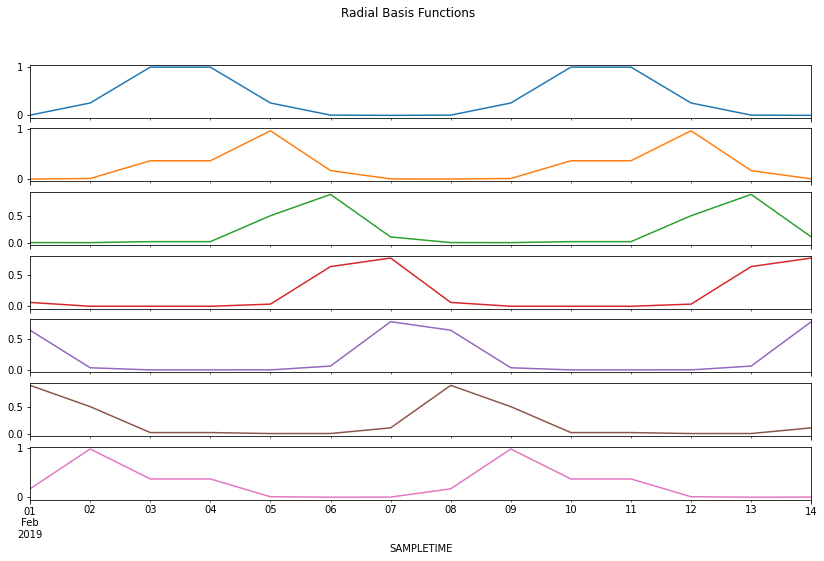

In [21]:
temp2[:14].plot(subplots=True, figsize=(14, 8), sharex=True, title="Radial Basis Functions", legend=False);

In [22]:
temp = df.copy()
temp.index = temp.SAMPLETIME
temp["hour_of_week"] = temp.index.weekday * 24 + temp.index.hour
rbf = RepeatingBasisFunction(n_periods=7, column="hour_of_week", input_range=None, width=1)
rbf.fit(temp)
temp2 = pd.DataFrame(index=temp.index, data=rbf.transform(temp))
temp2.head()

,0,1,2,3,4,5,6
SAMPLETIME,,,,,,,
2019-02-01 00:46:29+00:00,0.000142,0.000107,0.016633,0.350471,0.999426,0.385710,0.020146
2019-02-01 01:46:29+00:00,0.000182,0.000083,0.014012,0.321077,0.995671,0.417863,0.023734
2019-02-01 02:46:29+00:00,0.000233,0.000064,0.011763,0.293116,0.988450,0.451108,0.027862
2019-02-01 03:46:31+00:00,0.000296,0.000049,0.009841,0.266652,0.977839,0.485290,0.032595
2019-02-01 04:46:31+00:00,0.000376,0.000038,0.008204,0.241726,0.963949,0.520230,0.037997


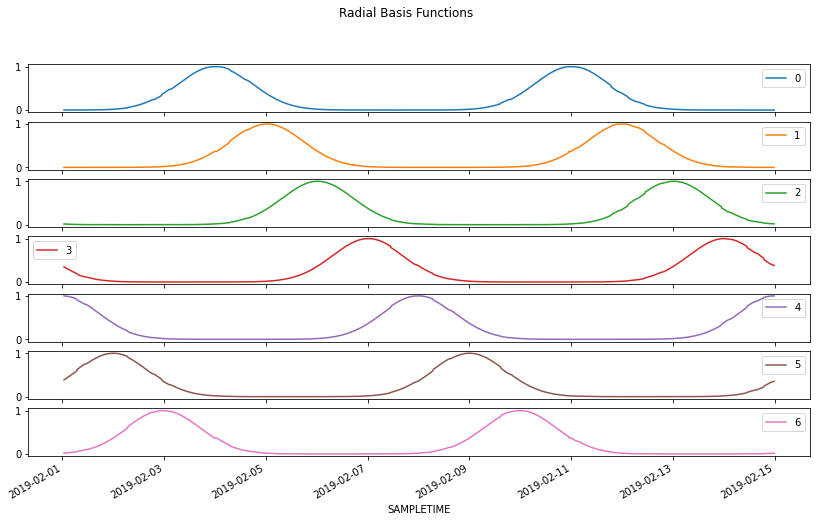

In [23]:
temp2[:24*14].plot(subplots=True, figsize=(14, 8), sharex=True, title="Radial Basis Functions", legend=True);